<a href="https://colab.research.google.com/github/Rustemhak/CV-3course-1sem/blob/main/SEG_GrabCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GrabCut algorithm



In [7]:
import cv2
from matplotlib import pyplot as plt

import requests
url = "https://avatarko.ru/img/kartinka/16/multfilm_volk_igrushka_15887.jpg"
r = requests.get(url)
with open('test.jpg', 'wb') as f:
    f.write(r.content) 

In [8]:
img = cv2.imread('test.jpg')

1. Определите (один или несколько) прямоугольников, содержащих объекты на рисунке.
2. Область за пределами прямоугольника автоматически рассматривается как фон.
3. Для определяемой пользователем прямоугольной области данные в фоновом режиме могут использоваться для различения областей переднего и заднего фона в ней.
4. Используйте модель гауссовой смеси (GMM) для моделирования фона и переднего плана и отметьте неопределенные пиксели как возможный передний план или фон.
5. Считается, что каждый пиксель изображения связан с окружающими пикселями через виртуальные края, и каждый край имеет вероятность принадлежности к переднему плану или фону, который основан на его Сходство в цвете окружающих пикселей.
6. Каждый пиксель (то есть узел в алгоритме) будет связан с передним или фоновым узлом.
7. После того, как узлы подключены (могут быть подключены к фону или переднему плану), если ребра между узлами принадлежат разным терминалам (то есть один узел принадлежит переднему плану, а другой узел - фону), то Срежет края между ними, что позволит сегментировать изображение.
Следующий рисунок может хорошо объяснить алгоритм:

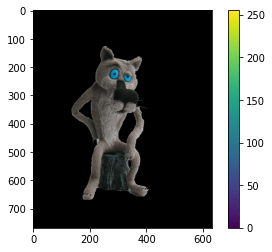

In [12]:
# Python program to illustrate
# foreground extraction using
# GrabCut algorithm

# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt

# path to input image specified and
# image is loaded with imread command
image = img
plt.imshow(image)
# create a simple mask image similar
# to the loaded image, with the
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)

# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)

# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images
rectangle = (100, 100, 550, 600)

# apply the grabcut algorithm with appropriate
# values as parameters, number of iterations = 3
# cv2.GC_INIT_WITH_RECT is used because
# of the rectangle mode is used
cv2.grabCut(image, mask, rectangle,
			backgroundModel, foregroundModel,
			3, cv2.GC_INIT_WITH_RECT)

# In the new mask image, pixels will
# be marked with four flags
# four flags denote the background / foreground
# mask is changed, all the 0 and 2 pixels
# are converted to the background
# mask is changed, all the 1 and 3 pixels
# are now the part of the foreground
# the return type is also mentioned,
# this gives us the final mask
mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

# The final mask is multiplied with
# the input image to give the segmented image.
image = image * mask2[:, :, np.newaxis]

# output segmented image with colorbar
plt.imshow(image)
plt.colorbar()
plt.show()
